<center>
<h1>
<b>Name: Nader M. Elhadedy</b><br>
<b>Task: Anomaly Detection</b>
</h1>
</center>


---

# Fetch **Credit Card Fraud Detection Dataset** from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"naderelhadedy","key":"5b7f23569d3034cdfe0acd3d4e97d886"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
ls

 creditcard.csv       'kaggle (1).json'   sample_data/
 creditcardfraud.zip   kaggle.json


# Exploring Dataset

In [ ]:
DATA_PATH = 'creditcard.csv'

In [ ]:
# import packages

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import average_precision_score
import pandas as pd
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
raw_df = pd.read_csv(DATA_PATH)
df = raw_df.copy()

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.sample(1).iloc[0]

Time      108838.000000
V1            -0.501650
V2             0.528513
V3             0.928346
V4            -1.256275
V5             2.659054
V6             4.175553
V7            -0.124988
V8             0.844914
V9             1.362456
V10           -1.119006
V11            1.021990
V12           -2.598889
V13            1.486729
V14            1.449761
V15            1.021414
V16           -0.346914
V17            0.211822
V18            0.400717
V19            0.417433
V20            0.136523
V21           -0.312409
V22           -0.561977
V23           -0.267003
V24            0.597666
V25            0.301067
V26           -0.706981
V27           -0.060370
V28           -0.152430
Amount         1.510000
Class          0.000000
Name: 156743, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(283726, 31)

In [ ]:
Counter(df.Class)

Counter({0: 283253, 1: 473})

> Plotting separately **the amount of the transactions vs. time** for fraudulent and non-fraudulent as well as **the distributions of amounts for each case**. 

> The goal is to see if fraudulent transactions have higher or lower amounts (on average) than non-fraudulents.

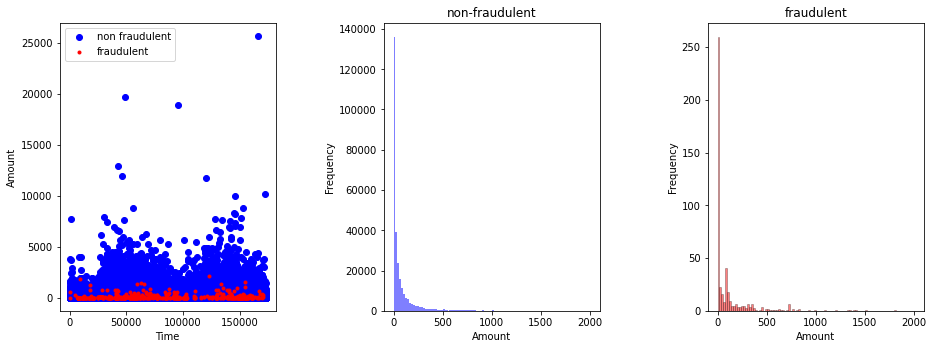

In [ ]:
fig, ax = plt.subplots(1, 3)
ax[0].scatter(df['Time'][df['Class'] == 0], df['Amount'][df['Class']==0], color='b' )
ax[0].scatter(df['Time'][df['Class'] == 1], df['Amount'][df['Class']==1], color='r' , marker='.')
ax[0].legend(['non fraudulent', 'fraudulent'], loc='best')
ax[1].hist(df['Amount'][df['Class']==0], 100, facecolor='b', alpha=0.5, label="Distribution of amounts for non-fraudulent ", range = [0,2000])
ax[2].hist(df['Amount'][df['Class']==1], 100, facecolor='r', ec="black", lw=0.5, alpha=0.5, label="Distribution of amounts for fraudulent", range = [0,2000])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amount")
ax[1].set_xlabel("Amount")
ax[1].set_ylabel("Frequency")
ax[2].set_xlabel("Amount")
ax[2].set_ylabel("Frequency")
ax[1].set_title('non-fraudulent')
ax[2].set_title('fraudulent')
fig.subplots_adjust(left=0, right=2, bottom=0, top=1, hspace=0.05, wspace=0.5)

> We can see that all fraudulent amounts are below 2000 euros. The majority of non-fraudulent namounts are also below 2000 euros, although there are several large amounts. This is a sign that the amount won't be a very important variable to detect a non-fraudulent transaction.

> What we want to analyze here is which of the features are more correlated with the class.

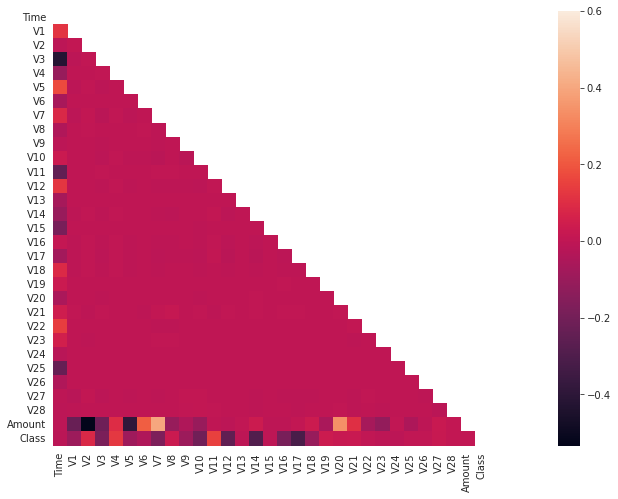

In [ ]:
plt.figure(figsize=(25,8))
corr=df.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, mask=mask, vmax=.6, square=True)
plt.show()

> We can see that the amount of the transaction or the time is not correlated with the class. The most correlated features with the class is V17 and V14, V12 and V10.

In [ ]:
np.abs(df.corrwith(df.Class)).sort_values()[1:-1]

V15       0.003300
V13       0.003897
V26       0.004265
V22       0.004887
Amount    0.005777
V23       0.006333
V24       0.007210
V28       0.009682
Time      0.012359
V20       0.021486
V27       0.021892
V21       0.026357
V8        0.033068
V19       0.033631
V6        0.043915
V2        0.084624
V5        0.087812
V9        0.094021
V1        0.094486
V18       0.105340
V4        0.129326
V11       0.149067
V7        0.172347
V3        0.182322
V16       0.187186
V10       0.206971
V12       0.250711
V14       0.293375
V17       0.313498
dtype: float64

> We will evaluate the distributions of the most correlated features and two of the least correlated ones for both fraudulent and non-fraudulent cases.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

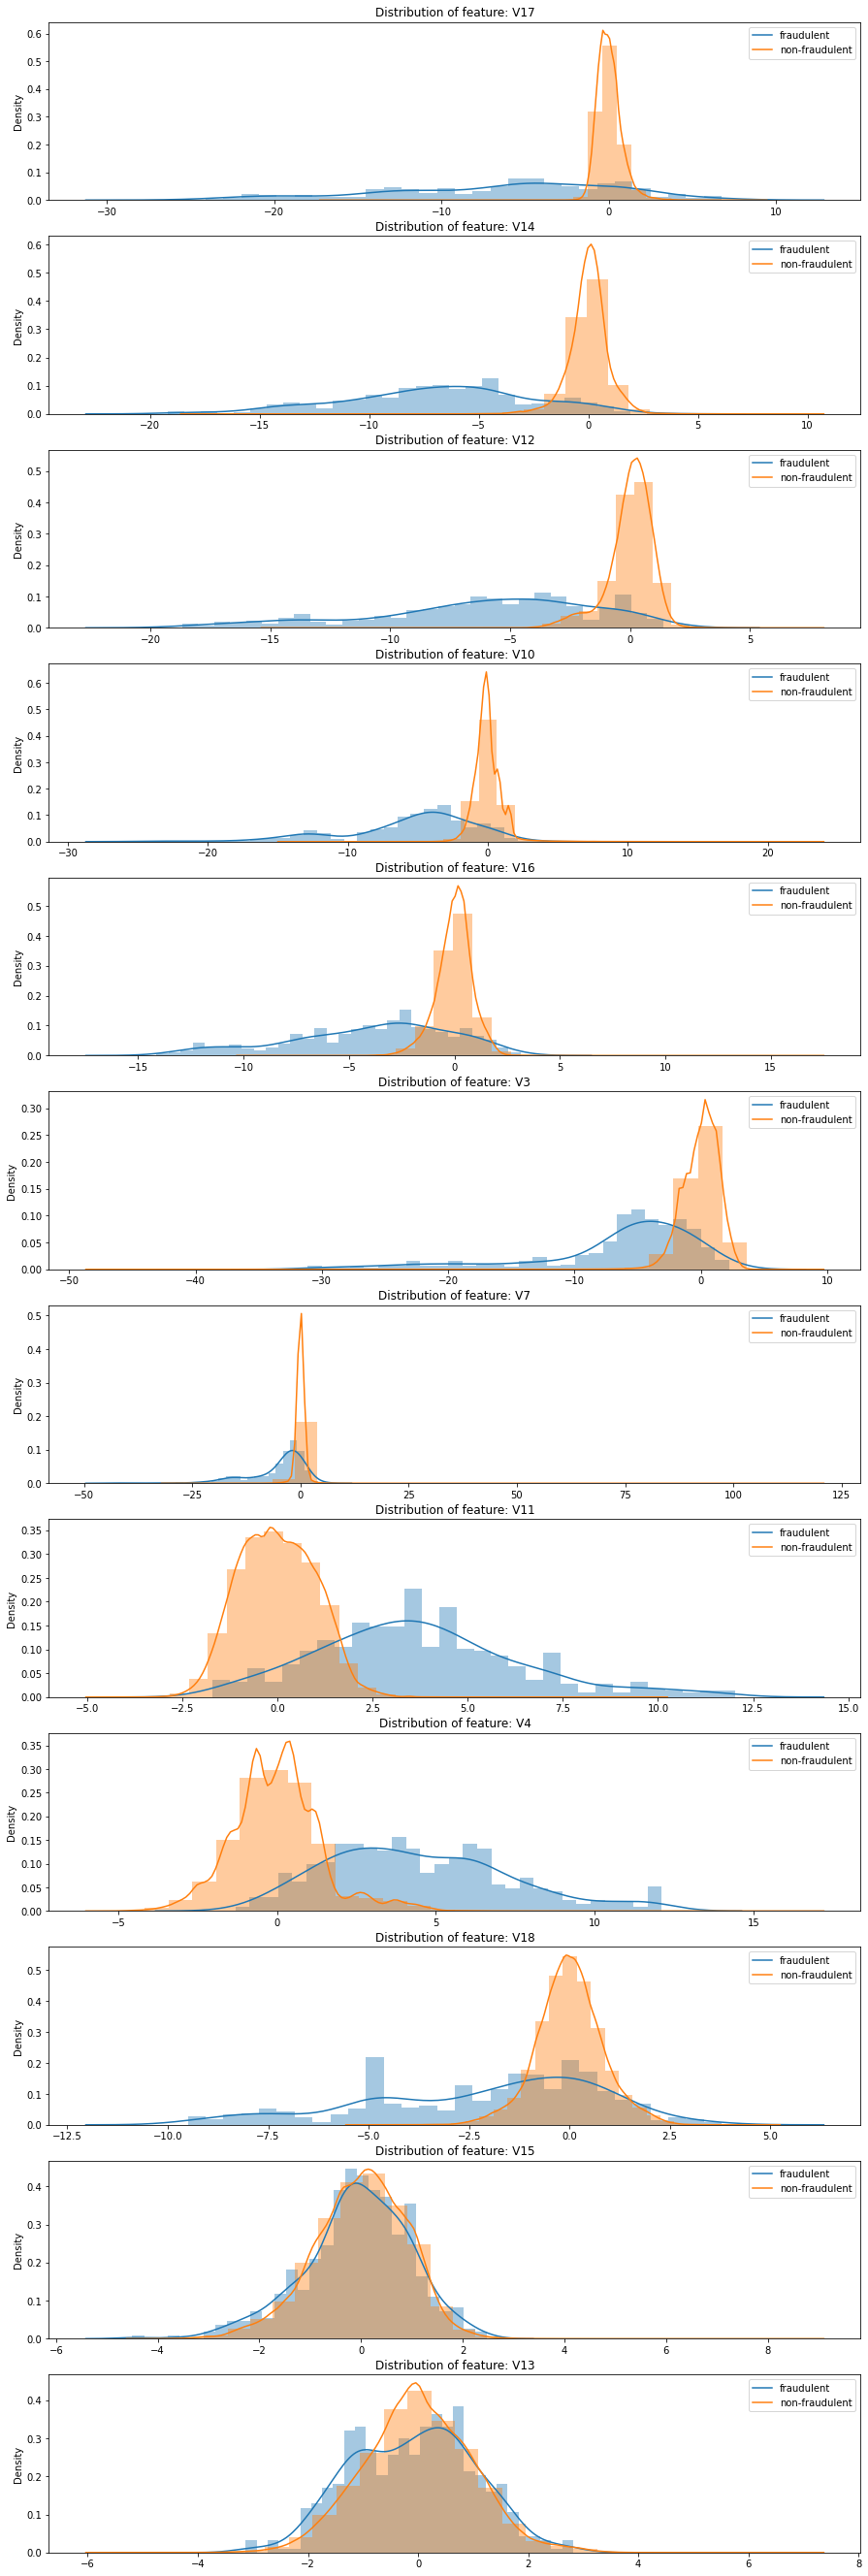

In [ ]:
features=['V17','V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18', 'V15', 'V13']
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feat][df.Class==1], bins=30)
    sns.distplot(df[feat][df.Class==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

> Here, I'll evaluate the scatterplots between features. We are trying to find what kind of Gaussian distributions we have (evaluate the covariances) so that we can estimate a Gaussian Mixture Model (GMM) using the Expectation-Maximization algorithm in order to represent the the non-fraudulent class. Finally, detect the fraudulent samples by evaluating their probabilities (below a threshold).

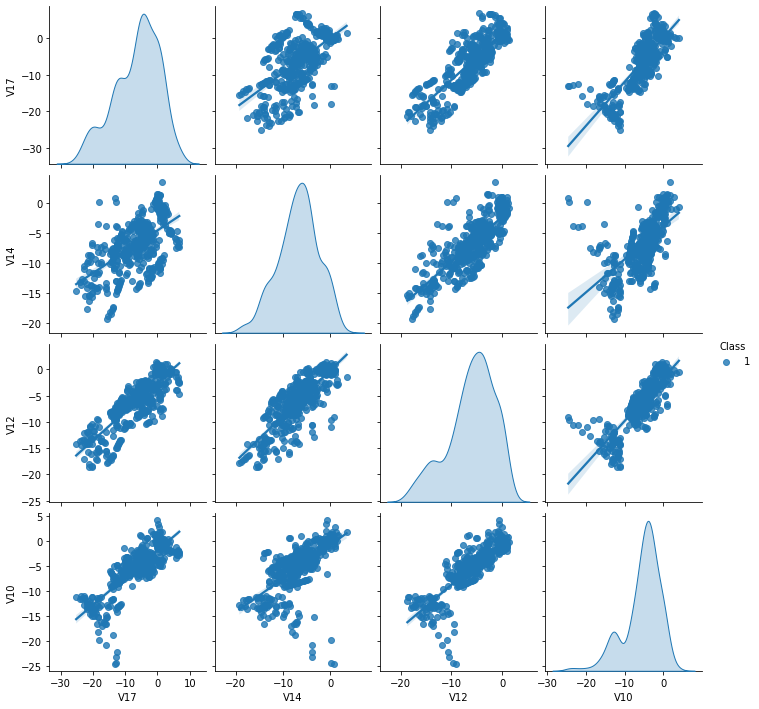

In [ ]:
sns.pairplot(df[df.Class==1], vars=['V17','V14', 'V12', 'V10'], kind='reg', hue='Class')

> # Using GMM model

### A Gaussian Mixture is a function that is comprised of several Gaussians, each identified by k ∈ {1,…, K}, where K is the number of clusters of our dataset. Each Gaussian k in the mixture is comprised of the following parameters:
* A mean μ that defines its centre.
* A covariance Σ that defines its width. This would be equivalent to the dimensions of an ellipsoid in a multivariate scenario.
* A mixing probability π that defines how big or small the Gaussian function will be.

### The GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. A GaussianMixture.fit method is provided that learns a Gaussian Mixture Model from train data. Given test data, it can assign to each sample the Gaussian it mostly probably belong to using the GaussianMixture.predict method.

> Now we will train a simple Gaussian mixture model. We will create a dataset with only non-fraudulent transactions and a dataset with fraudulent ones Then we will split non-fraudulent data in 90% for training GMM and 10% for cross-validation and testing, then we will split the fraudulent data in 50% for cross-validation (to find the probability threshold) and 50% for testing.

In [ ]:
feats = ['V17','V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18', 'Class']
df_0 = df[df.Class==0][feats]    #Dataset with non-fraudulent only
df_1 = df[df.Class==1][feats]    #Dataset with fraudulent only

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_0.drop(['Class'],axis=1), df_0['Class'] , test_size=0.1, random_state=0)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1.drop(['Class'],axis=1), df_1['Class'] , test_size=0.5, random_state=0)

clf = GaussianMixture()
clf.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

> Now that the GMM is fit, let's find the probabilities of the test set. After we find those probabilities, if the probability is below a threshold we will say it is a fraudulent transaction (that is because our GMM is based on non-fraudulent transactions). Low probability means that is not probable that a given transaction is non-fraudulent.

Text(0.5, 1.0, 'Predicted probabilities for test dataset')

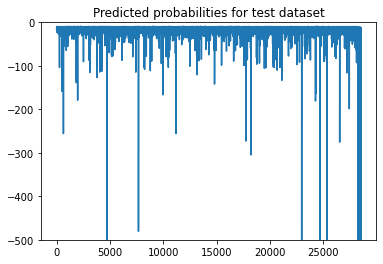

In [ ]:
y_test_proba = clf.score_samples(np.vstack([X_test, X_test_1]))
plt.plot(y_test_proba)
plt.ylim([-500, 0])
plt.title('Predicted probabilities for test dataset')

> We will improve the model by optimizing the GMM threshold T via 5-fold cross validation.

In [ ]:
# Split non-fraudulent data in 90% for training GMM and 10% for cross-validation and testing
X_N_train, X_N_cv_test, y_N_train, y_N_cv_test = train_test_split(df_0.drop(['Class'], axis=1), df_0['Class'], test_size=0.1, random_state=1)

# Split the fraudulent data in 50% for cross-validation and 50% for testing
X_F_cv, X_F_test, y_F_cv, y_F_test = train_test_split(df_1.drop(['Class'], axis=1), df_1['Class'], test_size=0.5, random_state=1)

# Split the remaining 10% non-fraudulent in 50% for cross-validation and 50% for testing
X_N_cv, X_N_test, y_N_cv, y_N_test = train_test_split(X_N_cv_test, y_N_cv_test, test_size=0.5, random_state=1)

In [ ]:
#Generate the 3 new datasets (Train + CV + test)
X_CV = np.vstack([X_N_cv, X_F_cv])
y_CV = np.hstack([y_N_cv, y_F_cv])
X_test = np.vstack([X_N_test, X_F_test])
y_test = np.hstack([y_N_test, y_F_test])

# Fit a Gaussian Mixture Model with the data from the NORMAL cases. *Note we are using ALL available features now.
clf = GaussianMixture()
clf.fit(X_N_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Text(0.5, 1.0, 'Predicted probabilities for validation dataset')

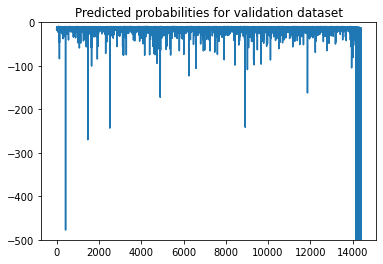

In [ ]:
y_test_proba = clf.score_samples(X_CV)
plt.plot(y_test_proba)
plt.ylim([-500, 0])
plt.title('Predicted probabilities for validation dataset')

> Our dataset is highly unbalanced as we saw. To evaluate the accuracy, we will use the average_precision_score.

> It summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight.

In [ ]:
kfold = StratifiedKFold(n_splits=5, random_state=1)  #Create 5-CV split object
T_vec = -np.arange(0,1000,2)   #Trying thresholds in steps of 2, from 0 to -1000. Note we are evaluating the negative log-likelihood.
aucpr_vs_t = []
precision_vs_t = []
recall_vs_t = []

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
for t in T_vec:
  
  aucpr = []
  precision = []
  recall = []
  k = 0
  for train_index, test_index in kfold.split(X_CV,y_CV):
          
    y_cv_proba = clf.score_samples(X_CV[test_index])   #Predict the probabilities of fold "k" using the fitted GMM 
    y_cv_pred = y_cv_proba.copy()
    y_cv_pred[y_cv_pred>=t] = 0
    y_cv_pred[y_cv_pred<t] = 1   

    precision.append(precision_score( y_CV[test_index], y_cv_pred))
    recall.append(recall_score( y_CV[test_index], y_cv_pred))
    aucpr.append(average_precision_score( y_CV[test_index], y_cv_pred))

    k = k + 1  
          
          
  aucpr_vs_t.append(np.mean(aucpr))
  precision_vs_t.append(np.mean(precision))
  recall_vs_t.append(np.mean(recall))

> Let's plot the performance results vs. the threshold. This allows us to see what is the optimal threshold value for maximum AUCPR.

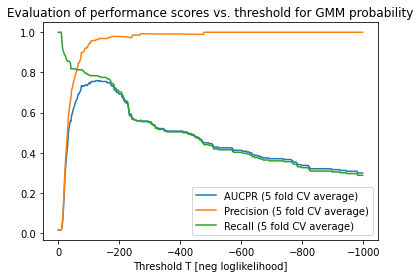

In [ ]:
plt.plot(T_vec, aucpr_vs_t)
plt.plot(T_vec, precision_vs_t)
plt.plot(T_vec,recall_vs_t)
ax = plt.gca()
ax.set(title='Evaluation of performance scores vs. threshold for GMM probability', xlabel='Threshold T [neg loglikelihood]')
ax.legend(['AUCPR (5 fold CV average)', 'Precision (5 fold CV average)', 'Recall (5 fold CV average)'])
ax.invert_xaxis()

> Finally, we select the thershold with maximum AUCPR and use it for the test set in order to obtain the performance of our model in the test set.

In [ ]:
print('Maximum cross validation AUCPR='+str(max(aucpr_vs_t).round(6)))
T_opt = T_vec[np.argmax(aucpr_vs_t)]
print('Optimal threshold T = '+str(T_opt))

Maximum cross validation AUCPR=0.759349
Optimal threshold T = -124


In [ ]:
y_test_proba = clf.score_samples(X_test)
y_test_pred = y_test_proba.copy()
y_test_pred[y_test_pred>=T_opt] = 0
y_test_pred[y_test_pred<T_opt] = 1   

test_precision = (precision_score( y_test, y_test_pred))
test_recall = (recall_score( y_test, y_test_pred))
test_aucpr = (average_precision_score( y_test, y_test_pred))
print("TEST results --> AUCPR=%.3f - Precision=%.3f - Recall=%.3f" %(test_aucpr, test_precision, test_recall) )

TEST results --> AUCPR=0.729 - Precision=0.934 - Recall=0.776


In [ ]:
Counter(y_test_pred)

Counter({0.0: 14203, 1.0: 197})

Text(0.5, 1.0, 'Precision-Recall curve: AUC=0.73')

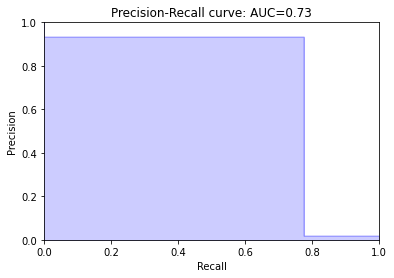

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(average_precision_score(y_test, y_test_pred)))

---

# Using Supervised model (Logistic Regression)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[feats].drop(['Class'],axis=1), df['Class'], test_size=0.2, random_state=0, stratify = df['Class'])

In [ ]:
logistic = LogisticRegression(max_iter=10000, random_state=0)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logistic.predict(X_test)

In [ ]:
Counter(y_pred)

Counter({0: 56683, 1: 63})

Text(0.5, 1.0, 'Precision-Recall curve: AUC=0.54')

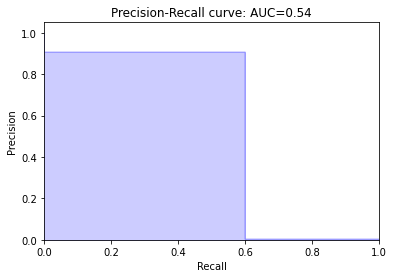

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format( average_precision_score(y_test, y_pred)))

> # We can see that the performance of logistic regression is pretty low compared to GMM model.

---

# Using PyOD models (one class svm)

> This is a type of unsupervised learning outlier detection method. The OCSVM algorithm maps input data into a high dimensional feature space (via a kernel) and iteratively finds the maximal margin hyperplane which best separates the training data from the origin.

In [ ]:
!pip install pyod
from pyod.models.ocsvm import OCSVM

In [ ]:
Counter(df.Class)

Counter({0: 283253, 1: 473})

In [ ]:
outliers_count = round(len(df[df.Class == 1])/len(df), 6)
outliers_count

0.001667

In [ ]:
clf2 = OCSVM(contamination=outliers_count)

In [ ]:
clf2.fit(X_train.iloc[:20000, :4])

OCSVM(cache_size=200, coef0=0.0, contamination=0.001667, degree=3,
   gamma='auto', kernel='rbf', max_iter=-1, nu=0.5, shrinking=True,
   tol=0.001, verbose=False)

In [ ]:
y_pred = clf2.predict(X_test.iloc[:20000, :4])

In [ ]:
Counter(y_pred)

Counter({0: 19952, 1: 48})

Text(0.5, 1.0, 'Precision-Recall curve: AUC=0.53')

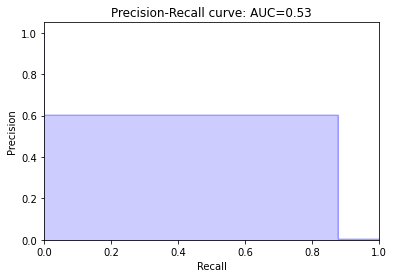

In [ ]:
precision, recall, _ = precision_recall_curve(y_test[:20000], y_pred)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(average_precision_score(y_test[:20000], y_pred)))

---

# About stacking GMM with Logistic Regression

### It's not possible to stack GMM with logistic regression in a pipeline as they are not of the same estimation type but it maybe possible if we created a customed gmm model used as a classifier and defining it as a sklearn base estimator.

In [ ]:
# estimators = [
#      ('m1', GaussianMixture(n_components=n_classes, max_iter=10000, random_state=0)),
#      ('m2', make_pipeline(StandardScaler(),
#                            LogisticRegression(random_state=0)))
#  ]

# models = StackingClassifier(
#      estimators=estimators, stack_method='predict'
#  )

In [ ]:
from sklearn.base import is_classifier

In [ ]:
is_classifier(clf)

False

In [ ]:
is_classifier(logistic)

True

In [ ]:
getattr(clf, "_estimator_type", None)

'DensityEstimator'

In [ ]:
getattr(logistic, "_estimator_type", None)

'classifier'